## 1. Import packages

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Load data

In [3]:
(x_train, y_train), (x_notrain, y_notrain) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### split the non-training data into two parts: validation set and test set

In [4]:
x_validation = x_notrain[:5000,:]
y_validation = y_notrain[:5000,]

In [5]:
x_test = x_notrain[5000:,:]
y_test = y_notrain[5000:,]

## 3. Visualize data

In [6]:
randnum = np.random.randint(0, 60000, 4)

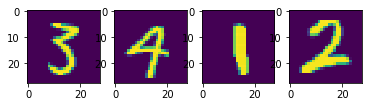

In [7]:
for icount in np.arange(4):
    plt.subplot(1,4,icount+1)
    img_current = x_train[randnum[icount]]
    plt.imshow(img_current)    

## 4. Prepare data in the right format

In [8]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/225

In [9]:
x_validation = x_validation.reshape(x_validation.shape[0], 28,28,1).astype('float32')/225

In [10]:
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/225

In [11]:
y_train = keras.utils.to_categorical(y_train,10)
y_validation = keras.utils.to_categorical(y_validation,10)
y_test = keras.utils.to_categorical(y_test,10)

## 5. Build up your convolutional neural networks

In [12]:
model = Sequential()

In [14]:
model.add(Conv2D(32, kernel_size=(3,3), strides=1,  padding='same', input_shape=(28,28,1), activation="relu"))

In [15]:
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(10,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## 6. Train your neural networks

In [20]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_validation,y_validation))

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1919 - acc: 0.9437 - val_loss: 0.0857 - val_acc: 0.9706
Epoch 2/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0580 - acc: 0.9828 - val_loss: 0.0709 - val_acc: 0.9782
Epoch 3/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0411 - acc: 0.9870 - val_loss: 0.0687 - val_acc: 0.9778
Epoch 4/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0290 - acc: 0.9910 - val_loss: 0.0703 - val_acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0219 - acc: 0.9932 - val_loss: 0.0722 - val_acc: 0.9800
Epoch 6/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0166 - acc: 0.9948 - val_loss: 0.0824 - val_acc: 0.9782
Epoch 7/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0808 - v

In [21]:
score = model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - 3s 637us/step


In [22]:
score

[0.029768727982846757, 0.9924]

## 7. Visualize your results

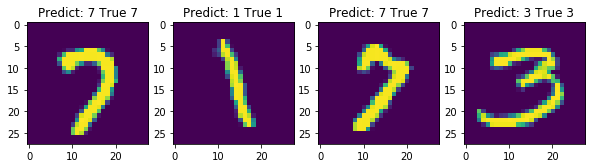

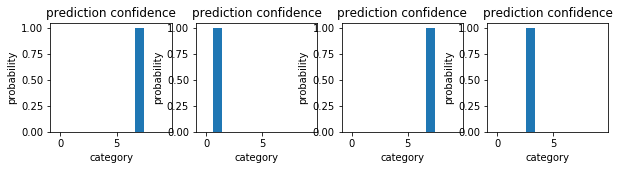

In [24]:
randnum = np.random.randint(0,5000,4)
x = x_test[randnum]
plt.figure(figsize=(10,30))
for i in np.arange(4):
    plt.subplot(1,4,i+1)
    y_predict = np.argmax(model.predict(x)[i])
    y_true = np.argmax(y_test[randnum[i]])
    img = np.reshape(x_test[randnum[i]], (28,28))
    plt.imshow(img)
    plt.title('Predict: %i True %i' %(y_predict, y_true ))
        
plt.figure(figsize=(10,2))
for i in range(4):
    bar = model.predict(x)[i]
    classes = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(1,4,i+1)
    plt.bar(classes, bar)
    plt.xlabel("category")
    plt.ylabel("probability")
    plt.title("prediction confidence")

## 8. Visualize the features learned by convolutional layers <font color=red>(optional)</font>

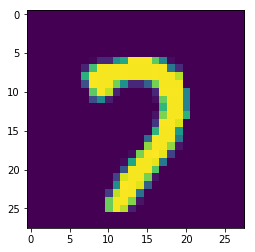

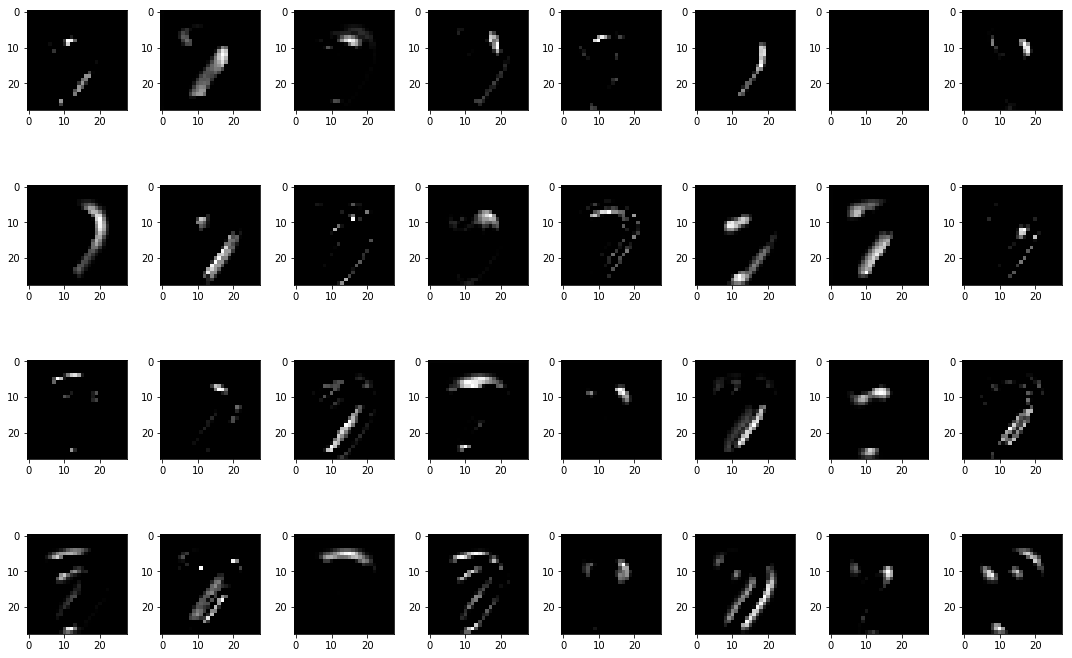

In [25]:
import keras.backend as K
inp = model.input
outputs = []
for layers in model.layers:
    outputs.append(layers.output)
 
functors = []
for out in outputs:
    functors.append(K.function([inp, K.learning_phase()], [out]))

#test = np.random.random((1,28,28,1))
test = x[0].reshape(1,28,28,1)
plt.imshow(test.reshape(28,28))
plt.show()
layer_outs = []
for func in functors:
    layer_outs.append([func([test,0])])
  
# features detected in the second convolutional layer for each filter
images = layer_outs[1][0][0][0] #change the first index to '0' if want to see the first convolutional layer
plt.figure(figsize=(15,10))
for i in range(32): #change this if filter size is not 32
  plt.subplot(4,8,i+1)
  plt.imshow(images[:,:,i], cmap="gray")
plt.tight_layout()

## Acknowledgments
I would like to thank Felicia Nurindrawati for help create this Keras tutorial. Felicia is currently a graduate student working with Dr. Jiajia Sun in the Department of Earth and Atmospheric Sciences at the University of Houston. <br>

<img src = "poto.png" width="300">